# <p style="text-align: right;"> &#9989; Jamie Huang</p>
# <p style="text-align: right;"> &#9989; jamieh8821</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone -b hw04 https://github.com/jamieh8821/CMSE202-f25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


How many patients are in this dataset? What are features of the patients?

In [2]:
print("Total patients:", len(df))

print("Columns:", df.columns.tolist())

Total patients: 100000
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


<font size=6 color="#009600">&#9998;</font> Total patients: 100000
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [3]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['smoking_history'] = df['smoking_history'].map({'Never smoked': 0, 'Formerly smoked': 1, 'Smokes': 2})

df['diabetes'] = df['diabetes'].map({0: -1, 1: 1})

### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [4]:
# copy your perceptron class to his cell
import numpy as np
class Perceptron():
    def __init__(self, labeled_data, iters, learning_rate):
        self.data = np.array(labeled_data)
        num_features = self.data.shape[1] - 1
        self.weights = np.ones(num_features + 1) 
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        x = np.insert(feature_set, 0, 1)      
        return 1 if np.dot(x, self.weights) > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                features, actual = row[:-1], row[-1]
                pred = self.predict(features)
                error = actual - pred
                # update bias
                self.weights[0] += self.learning_rate * error
                # update each weight
                for i in range(1, len(self.weights)):
                    self.weights[i] += self.learning_rate * error * features[i-1]

    def errors(self):
        err = 0
        for row in self.data:
            if self.predict(row[:-1]) != row[-1]:
                err += 1
        print(f'Number of errors: {err}')
        return err



features = df.drop('diabetes', axis=1).values
labels   = df['diabetes'].values
labeled_data = np.column_stack([features, labels])  


p = Perceptron(labeled_data, iters=100, learning_rate=0.1)
p.fit()
p.errors()


Number of errors: 8500


8500

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [5]:
# put your code here
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


train_data = np.column_stack([X_train, y_train])


p = Perceptron(train_data, iters=100, learning_rate=0.1)
p.fit()

y_pred = np.array([p.predict(x) for x in X_test])

accuracy = np.mean(y_pred == y_test)
print(f"Perceptron test accuracy: {accuracy * 100:.2f}%")


Perceptron test accuracy: 91.50%


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [6]:
y_pred = np.array([p.predict(x) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print(f"Perceptron test accuracy: {accuracy * 100:.2f}%")

Perceptron test accuracy: 91.50%


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [7]:
#[1] OpenAI ChatGPT-4.0. Accessed on April 25, 2025 from https://chat.openai.com/. Prompt chain:{‘With my perceptron, what would be the ideal iteration and adjusting learning rate to get a better accuracy'}

p.iters          = 500      # bump epochs up from 100 to 500
p.learning_rate = 0.05     # shrink step size

p.weights[:] = 1.0

p.fit()

# 4) Check training errors again
p.errors()   # should (hopefully) be lower now

Number of errors: 5950


5950

In [8]:
errors = p.errors()

n_samples = p.data.shape[0]

train_accuracy = (n_samples - errors) / n_samples
print(f"Training accuracy: {train_accuracy * 100:.2f}%")

Number of errors: 5950
Training accuracy: 91.50%


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [9]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
df = pd.read_csv(url)
display(df.head(10))


cat_cols = df.select_dtypes(include="object").columns.tolist()
df['custcat'] = df['custcat'].astype('category').cat.codes
display(df.head(10))

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
5,2,41,39,78,0,17,2,16,0,1,1,C
6,3,45,22,19,1,2,2,4,0,1,5,B
7,2,38,35,76,0,5,2,10,0,0,3,D
8,3,45,59,166,1,7,4,31,0,0,5,C
9,1,68,41,72,1,21,1,22,0,0,3,B


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,0
1,3,11,33,136,1,7,5,5,0,0,6,3
2,3,68,52,116,1,24,1,29,0,1,2,2
3,2,33,33,33,0,12,2,0,0,1,1,0
4,2,23,30,30,1,9,1,2,0,0,4,2
5,2,41,39,78,0,17,2,16,0,1,1,2
6,3,45,22,19,1,2,2,4,0,1,5,1
7,2,38,35,76,0,5,2,10,0,0,3,3
8,3,45,59,166,1,7,4,31,0,0,5,2
9,1,68,41,72,1,21,1,22,0,0,3,1


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [10]:
# put your modified perceptron class here
import numpy as np

class Perceptron():
    def __init__(self, labeled_data, iters=100, learning_rate=0.1):
        self.data = np.array(labeled_data)
        num_features = self.data.shape[1] - 1
        self.weights = np.ones(num_features + 1)  
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        x = np.insert(feature_set, 0, 1)  
        return 1 if np.dot(x, self.weights) > 0 else -1

    def score(self, feature_set):
        x = np.insert(feature_set, 0, 1)  # add bias term
        return np.dot(x, self.weights)

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                features, actual = row[:-1], row[-1]
                pred = self.predict(features)
                error = actual - pred
                # update bias weight
                self.weights[0] += self.learning_rate * error
                # update feature weights
                for i in range(1, len(self.weights)):
                    self.weights[i] += self.learning_rate * error * features[i-1]

    def errors(self):
        err = 0
        for row in self.data:
            if self.predict(row[:-1]) != row[-1]:
                err += 1
        print(f'Number of errors: {err}')
        return err


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [11]:
# put your code here
X = df.drop('custcat', axis=1).values
y = df['custcat'].values

X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

classes = np.unique(y_train_raw)              
Y_train = (y_train_raw[:,None] == classes[None,:]).astype(int)*2 - 1 
Y_test  = (y_test_raw[:,None]  == classes[None,:]).astype(int)*2 - 1

print("classes:", classes)
print("Y_train shape:", Y_train.shape)

classes: [0 1 2 3]
Y_train shape: (700, 4)


* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [12]:
# put your code here
import numpy as np


datasets = [
    np.column_stack([X_train, Y_train[:, i]]) 
    for i in range(Y_train.shape[1])
]

perceptrons = [
    Perceptron(data, iters=100, learning_rate=0.1)
    for data in datasets
]

for p in perceptrons:
    p.fit()

accuracies = [
    (len(data) - p.errors()) / len(data)
    for p, data in zip(perceptrons, datasets)
]

for cls, acc in zip(classes, accuracies):
    print(f"Class {cls}: {acc*100:.2f}%")


Number of errors: 174
Number of errors: 541
Number of errors: 235
Number of errors: 271
Class 0: 75.14%
Class 1: 22.71%
Class 2: 66.43%
Class 3: 61.29%


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [13]:
# put your code here
# Was having issue printing out confidence score
#[2] OpenAI ChatGPT-4.0. Accessed on April 25, 2025 from https://chat.openai.com/. Prompt chain:{‘my code is not printing the confidence, can you fix this?'}

y_pred = []
for x in X_test:
    scores = [p.score(x) for p in perceptrons]    
    best_idx = int(np.argmax(scores))             
    y_pred.append(classes[best_idx]) 
y_pred = np.array(y_pred)

accuracy = np.mean(y_pred == y_test_raw)
print(f"One‐vs‐Rest Perceptron Test Accuracy: {accuracy * 100:.2f}%")

One‐vs‐Rest Perceptron Test Accuracy: 21.33%


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> It is very poor because its only 20%


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [2]:
# put your code here.
#[3] OpenAI ChatGPT-4.0. Accessed on April 25, 2025 from https://chat.openai.com/. Prompt chain:{‘my code keeps overloading my kernel and I'm not sure how to fix this.'}
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm            import SVC

#Small subset for GridSearch
X_small, y_small = X[:200], y[:200]

#Hyperparameter grid
param_grid = {
    'C':      [1e-2, 1e-1, 1, 10],
    'gamma':  [1e-4, 1e-3, 1e-2, 1e-1],
    'kernel': ['linear', 'rbf']   # drop 'sigmoid' if it still stalls
}

clf = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=5,
    n_jobs=1  # <-- avoid overloading the kernel
)

print("Fitting the classifier to the (small) training set...")
clf.fit(X_small, y_small)
print("Best parameters found:")
print(clf.best_params_)


Fitting the classifier to the (small) training set...
Best parameters found:
{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

SVC test accuracy: 40.33%


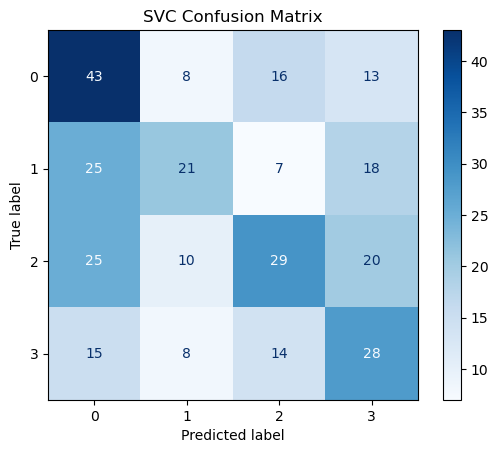

In [3]:
# put your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

best_svc = clf.best_estimator_

best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"SVC test accuracy: {acc*100:.2f}%")

cm = confusion_matrix(y_test, y_pred, labels=best_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> Yes, instead of 20% it is 40% which is double but still not very good but definitely an improvement

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [ ]:
# put your code here
import time
import numpy as np
import pandas as pd
from sklearn.decomposition    import PCA
from sklearn.svm              import SVC
from sklearn.model_selection  import GridSearchCV, train_test_split
from sklearn.metrics          import accuracy_score
import matplotlib.pyplot as plt

n_components = list(range(1, 12))
accuracy_list = []
time_list     = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca  = pca.transform(X_test)
    
    clf = GridSearchCV(
        SVC(class_weight='balanced'),
        param_grid,
        cv=5,
        n_jobs=1
    )
    t0 = time.time()
    clf.fit(X_train_pca, y_train)
    elapsed = time.time() - t0
    
    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    
    accuracy_list.append(acc)
    time_list.append(elapsed)
    
    print(f"PCA={n:2d}  best_params={clf.best_params_}  "
          f"acc={acc*100:5.2f}%  time={elapsed:5.2f}s")

plt.figure(figsize=(8,4))
plt.plot(n_components, np.array(accuracy_list)*100, marker='o')
plt.xlabel('n_components')
plt.ylabel('Test Accuracy (%)')
plt.title('Accuracy vs PCA Components')


plt.figure(figsize=(8,4))
plt.plot(n_components, time_list, marker='o')
plt.xlabel('n_components')
plt.ylabel('GridSearch Time (s)')
plt.title('Run Time vs PCA Components')


PCA= 1  best_params={'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}  acc=30.67%  time=129.84s


Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> my kernel broke, I would think that it wouldn't be as accurate because theres many more variables and the PCA might have removed information that separates some of the features

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University